In [6]:
## allow interaction with the plots
%matplotlib widget

%load_ext autoreload
%autoreload 2

# add the main directory reference and import 'imports.py'
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")
from imports import *

logger = logging.getLogger()
logger.setLevel(level=logging.WARN)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from data.Titanic import Titanic


class params:
    batch_size = 32
    lr = 0.001
    hidden_size = 128
    layers = 3
    dropout = 0.3
    max_epochs = 60
    n_blks = 1


data = Titanic(DataConfig.create(params))

data.preview(samples=1)
sample = data.sample_batch()
data.describe_index(0)


Numerical indices: (3, 4, 5, 6)
data[-1] counts in label order from 0:
0: 545
1: 342

Train Data (24 batches) Preview:
--------------------------------------------------
Constituent shapes:
batch[0]: torch.Size([32, 7]), torch.float32
batch[1]: torch.Size([32]), torch.int64

First 1 samples:

Sample 0: 

tensor([ 0.0000,  1.0000,  0.0000,  3.0000,  1.0000,  1.0000, 18.7500])

1

Validation Data (5 batches)  Preview:
--------------------------------------------------

Sample 0: 

tensor([ 0.0000,  0.0000,  0.0000, 22.0000,  1.0000,  0.0000,  7.2500])

0

Training Batch[0] Statistics:
--------------------------------------------------


Traceback (most recent call last):
Traceback (most recent call last):
  File "/ARCHIVE/Personal/00b819b63957825da2302d9ab62bead0c28a6e8a/.pixi/envs/default/lib/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/ARCHIVE/Personal/00b819b63957825da2302d9ab62bead0c28a6e8a/.pixi/envs/default/lib/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/ARCHIVE/Personal/00b819b63957825da2302d9ab62bead0c28a6e8a/.pixi/envs/default/lib/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ARCHIVE/Personal/00b819b63957825da2302d9ab62bead0c28a6e8a/.pixi/envs/default/lib/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ARCHIVE/Personal/00b819b63957825da2302d9ab62bead0c28a6e8a/.pixi


feature_dims [1]: 
Type: torch.float32
Min:
tensor([0., 0., 0., 1., 0., 0., 0.])
Max:
tensor([  1.0000,   1.0000,   1.0000,  64.0000,   2.0000,   5.0000, 106.4250])
Mean:
tensor([ 0.3125,  0.3125,  0.3750, 32.6562,  0.2500,  0.4375, 28.8255])
Std:
tensor([ 0.4709,  0.4709,  0.4919, 14.6389,  0.5080,  1.1622, 24.9043])


In [15]:
def init_metrics(flush_every):
    classification_val = MetricsFrame(
        [
            from_te(torcheval.metrics.BinaryAccuracy, "Accuracy"),
            from_te(torcheval.metrics.BinaryPrecision, "Precision"),
            from_te(torcheval.metrics.BinaryF1Score, "F1"),
        ],
        flush_every=flush_every,
    )
    cval_board = ProgressBoard(ylabel="Percent", title="Metrics (Validation)")
    cval_board.add_mf(classification_val)

    classification_train = MetricsFrame(
        [
            from_te(torcheval.metrics.BinaryAccuracy, "Accuracy"),
            from_te(torcheval.metrics.BinaryPrecision, "Precision"),
            from_te(torcheval.metrics.BinaryF1Score, "F1"),
        ],
        flush_every=flush_every,
    )
    ctrain_board = ProgressBoard(ylabel="Percent", title="Metrics (Validation)")
    ctrain_board.add_mf(classification_train)
    return {
        "train_mfs": [classification_train],
        "val_mfs": [classification_val],
    }


def eval_model(trainer: Trainer):
    eval_ms = MetricsFrame(
        [from_te(torcheval.metrics.BinaryConfusionMatrix, "ConfusionMatrix")],
        flush_every=0,
        xlabel=None,
    )
    trainer.eval(
        pred=True,
        loss=True,
        mfs=eval_ms,
    )
    plot_2dheatmap(eval_ms.dict["ConfusionMatrix"][0])


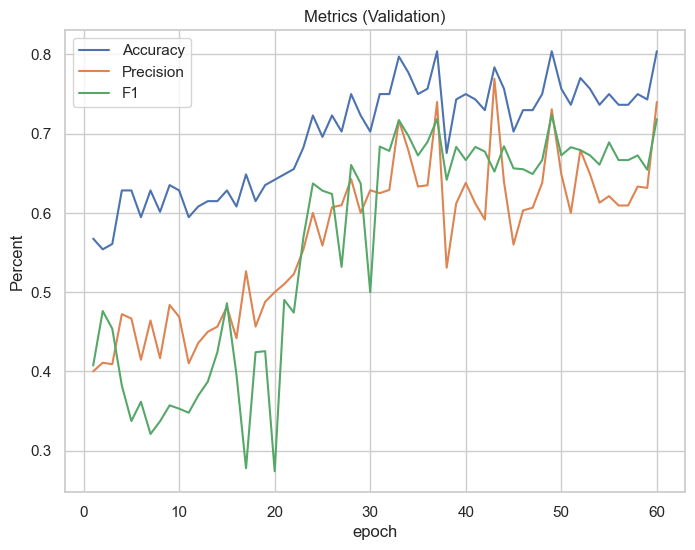

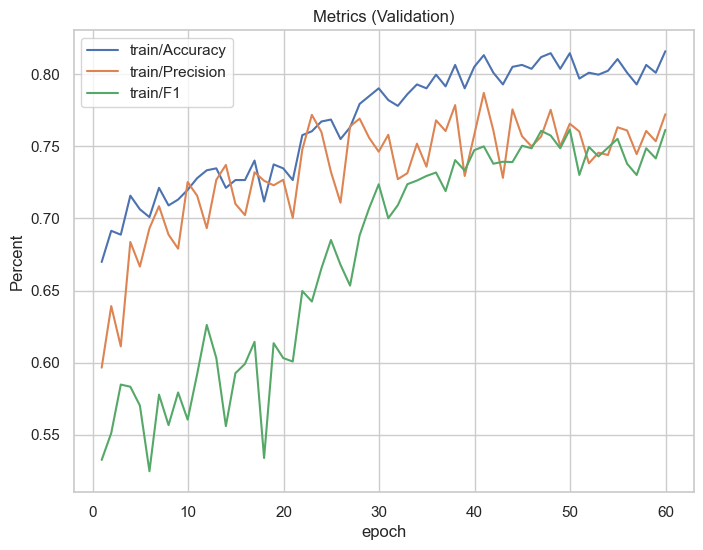

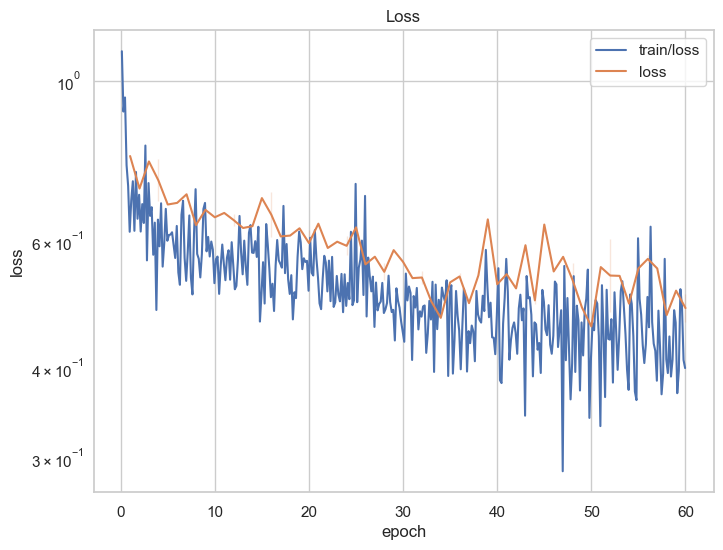

Epochs progress:   0%|          | 0/60 [00:00<?, ?Epoch/s]

tensor(0.0972, device='cuda:0')

In [16]:
from lib.train import *
from models.MLP import *

model = MLPClassifier(MLPConfig.create(params, n_classes=data.classes))
trainer = Trainer(TrainerConfig.create(params, **init_metrics(1)))
trainer.fit(model, data.loaders())


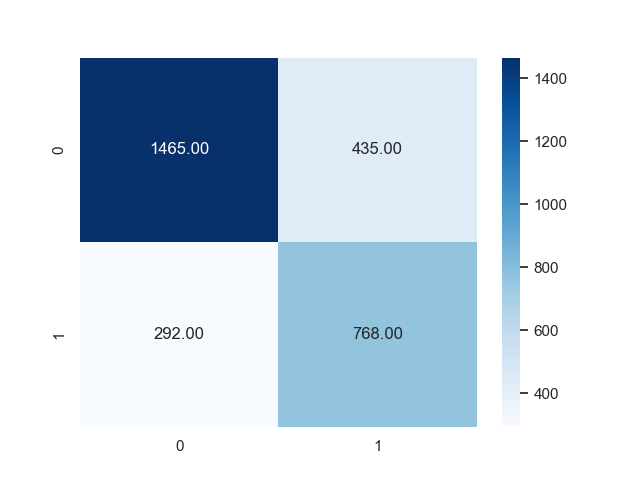

In [ ]:
eval_model(trainer)
